<a href="https://colab.research.google.com/github/Aryasita629/Aryasita629.github.io/blob/main/FIXXXX_SKRIPSI_METODE_DECISION_TREE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
!pip install graphviz

In [34]:
from sklearn import tree
import numpy as np
import pandas as pd
import pydotplus
import matplotlib.pyplot as plt

In [35]:
dataset = pd.read_excel('DATA DIAGNOSA KELUHAN.xlsx')
dataset.head()

,Hasil Diagnosa,P1 (Nyeri pinggang),P2 (Tenggorokan nyeri),P3 (Batuk),P4 (Nyeri pada persendian),P5 (Nyeri Lutut),P6 (Pusing),P7 (Nyeri leher),P8 (Nyeri perut sebelah kanan),P9 (Panas),...,P17 (Iritasi di sekitar anus),P18 (Pembengkakan pembuluh darah yang terletak di anus),P19 (Kontrol piskosa),P20 (Gangguan mental berat),P21 (Mata kanan merah),P22 (Infeksi pada kornea mata),P23 ( Pembengkakan pada kulit),P24 ( Kaki kanan bengkak),P25 (Bising usus meningkat),P26 ( Nyeri lambung )
0,myalgia,1,0,0,0,0,0.0,0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,myalgia,1,0,0,0,0,0.0,0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,myalgia,0,1,1,0,0,0.0,0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,myalgia,0,0,0,1,0,0.0,0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,myalgia,1,0,0,0,0,0.0,0,0,0.0,...,0,0,0,0,0,0,0,0,0,0


<ipython-input-36-d49ad677c72c>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = dataset.corr(method='pearson')


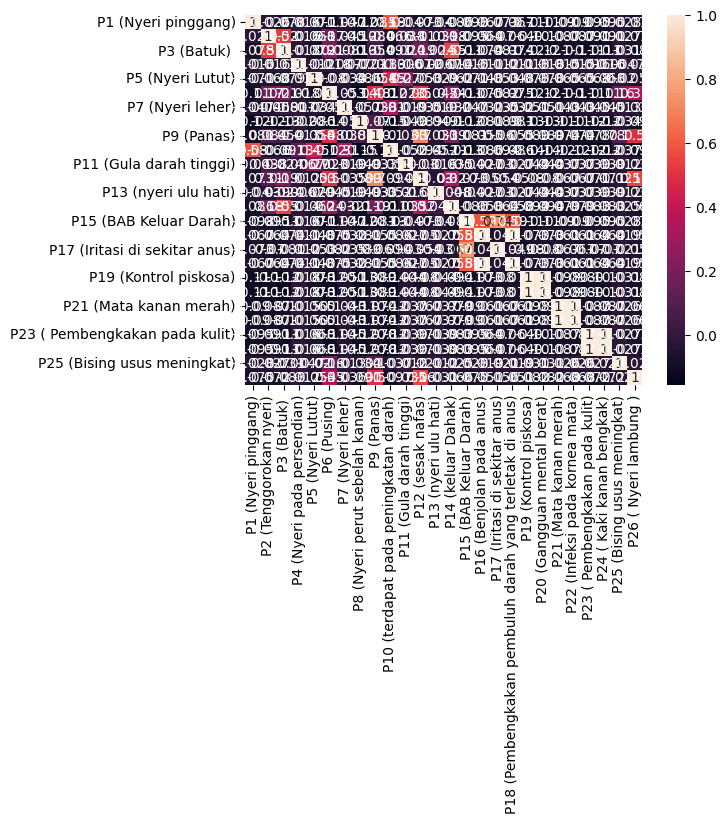

In [36]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_excel('DATA DIAGNOSA KELUHAN.xlsx')
corr_matrix = dataset.corr(method='pearson')
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [37]:
x = dataset.iloc[:, [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]].values
y = dataset.iloc[:, -1].values
print(x)
print(y)

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [38]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print("x_train = ", len(x_train))
print("x_test = ", len(x_test))
print("y_train = ", len(y_train))
print("y_test = ", len(y_test))

x_train =  296
x_test =  74
y_train =  296
y_test =  74


In [39]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

print(x_test , y_train)

[[-0.31031645 -0.316815   -0.34815531 ... -0.29025693 -0.29704426
  -0.29704426]
 [-0.31031645 -0.316815   -0.34815531 ...  3.44522354 -0.29704426
  -0.29704426]
 [-0.31031645 -0.316815   -0.34815531 ... -0.29025693 -0.29704426
  -0.29704426]
 ...
 [-0.31031645  3.15641616  2.87228132 ... -0.29025693 -0.29704426
  -0.29704426]
 [-0.31031645 -0.316815   -0.34815531 ... -0.29025693 -0.29704426
  -0.29704426]
 [-0.31031645 -0.316815   -0.34815531 ... -0.29025693 -0.29704426
  -0.29704426]] [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [40]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(x_test,y_test)

DecisionTreeClassifier()

In [42]:
y_pred = classifier.predict(x_test)
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0]


In [43]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
from sklearn.metrics import classification_report
akurasi = classification_report(y_test, y_pred)
print(akurasi)
from sklearn.metrics import accuracy_score
akurasi = accuracy_score(y_test,y_pred)
print("Tingkat Akurasi :%d persen"%(akurasi*100))

[[69  0]
 [ 1  4]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        69
           1       1.00      0.80      0.89         5

    accuracy                           0.99        74
   macro avg       0.99      0.90      0.94        74
weighted avg       0.99      0.99      0.99        74

Tingkat Akurasi :98 persen


In [44]:
from sklearn.metrics import precision_score
precision = precision_score(y_test,y_pred)
print('Precision: %.3f' % precision)

Precision: 1.000


In [45]:
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred)
print('recall: %.3f' % recall)

recall: 0.800


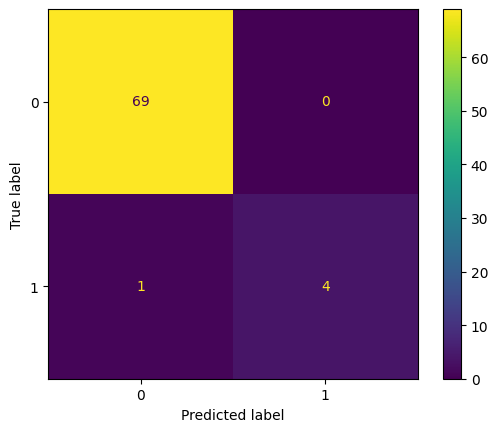

In [46]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Plot the confusion matrix in graph
cm = confusion_matrix(y_test,y_pred, labels=classifier.classes_)
# ploting with labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot()
# showing the matrix
plt.show()

In [47]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import pandas as pd

df = pd.read_excel('DATA DIAGNOSA KELUHAN.xlsx')

print(df.columns)



Index(['Hasil Diagnosa', 'P1 (Nyeri pinggang)', 'P2 (Tenggorokan nyeri)',
       'P3 (Batuk) ', 'P4 (Nyeri pada persendian)', 'P5 (Nyeri Lutut)',
       'P6 (Pusing)', 'P7 (Nyeri leher)', 'P8 (Nyeri perut sebelah kanan)',
       'P9 (Panas)', 'P10 (terdapat pada peningkatan darah)',
       'P11 (Gula darah tinggi)', 'P12 (sesak nafas)', 'P13 (nyeri ulu hati)',
       'P14 (keluar Dahak)', 'P15 (BAB Keluar Darah)',
       'P16 (Benjolan pada anus)', 'P17 (Iritasi di sekitar anus)',
       'P18 (Pembengkakan pembuluh darah yang terletak di anus)',
       'P19 (Kontrol piskosa)', 'P20 (Gangguan mental berat)',
       'P21 (Mata kanan merah)', 'P22 (Infeksi pada kornea mata)',
       'P23 ( Pembengkakan pada kulit)', 'P24 ( Kaki kanan bengkak)',
       'P25 (Bising usus meningkat)', 'P26 ( Nyeri lambung )'],
      dtype='object')


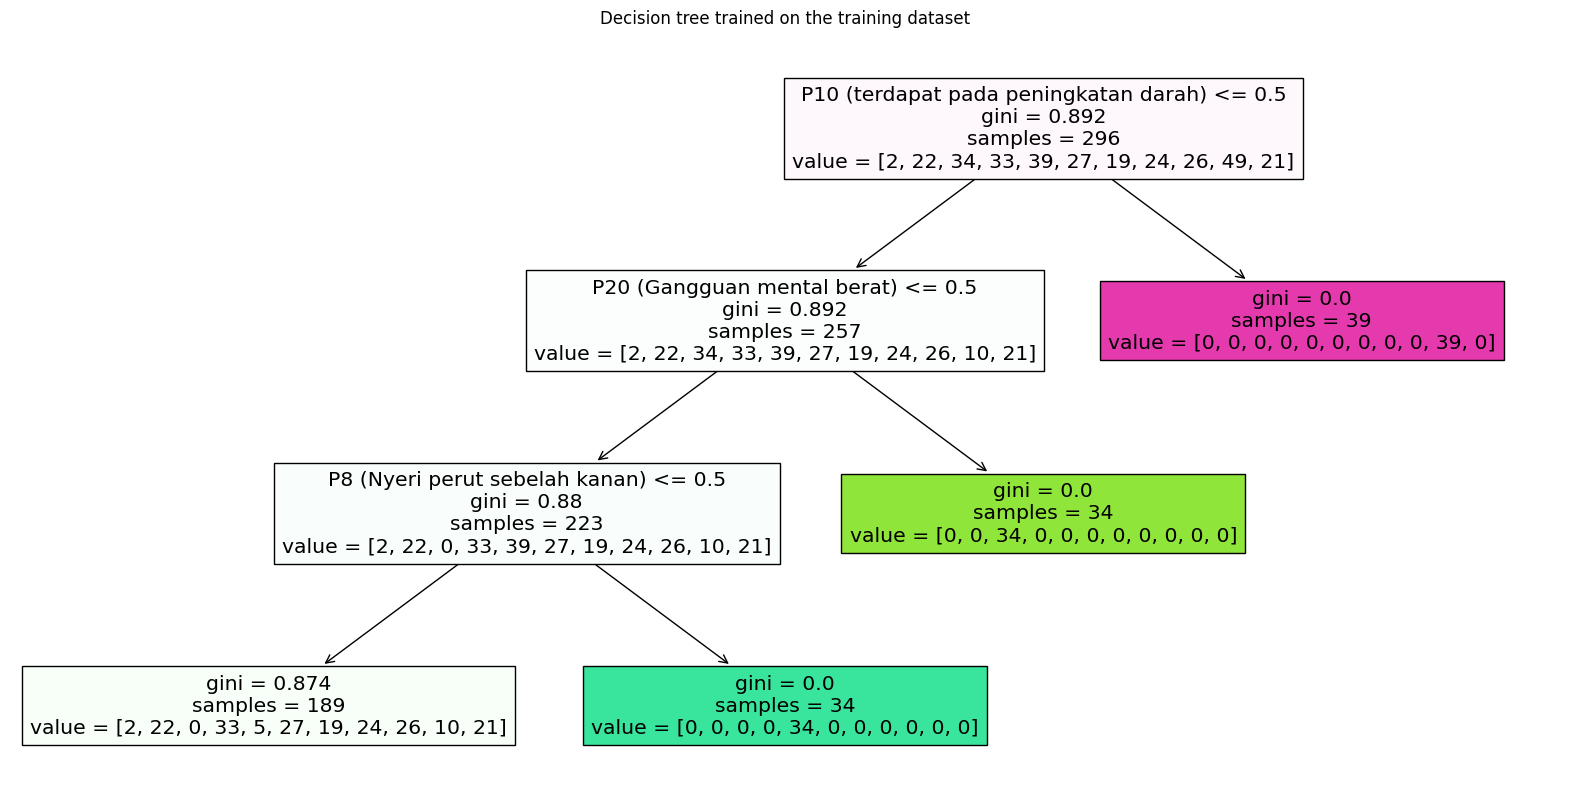

In [48]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import pandas as pd

df = pd.read_excel('DATA DIAGNOSA KELUHAN.xlsx')

# Assuming you have a DataFrame called 'df' with columns including features and labels
# Replace 'feature1', 'feature2', ..., 'label' with the actual column names in your dataset
x = df[['P1 (Nyeri pinggang)', 'P2 (Tenggorokan nyeri)',
       'P3 (Batuk) ', 'P4 (Nyeri pada persendian)', 'P5 (Nyeri Lutut)',
       'P6 (Pusing)', 'P7 (Nyeri leher)', 'P8 (Nyeri perut sebelah kanan)',
       'P9 (Panas)', 'P10 (terdapat pada peningkatan darah)',
       'P11 (Gula darah tinggi)', 'P12 (sesak nafas)', 'P13 (nyeri ulu hati)',
       'P14 (keluar Dahak)', 'P15 (BAB Keluar Darah)',
       'P16 (Benjolan pada anus)', 'P17 (Iritasi di sekitar anus)',
       'P18 (Pembengkakan pembuluh darah yang terletak di anus)',
       'P19 (Kontrol piskosa)', 'P20 (Gangguan mental berat)',
       'P21 (Mata kanan merah)', 'P22 (Infeksi pada kornea mata)',
       'P23 ( Pembengkakan pada kulit)', 'P24 ( Kaki kanan bengkak)',
       'P25 (Bising usus meningkat)', 'P26 ( Nyeri lambung )']]
y = df['Hasil Diagnosa']  # Replace 'diagnosis' with the actual target column name


# Assuming x and y are your features and labels
# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create a SimpleImputer to handle missing values
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on the training data
x_train_imputed = imputer.fit_transform(x_train)

# Transform the test data using the same imputer
x_test_imputed = imputer.transform(x_test)

# Create and train the DecisionTreeClassifier with limited depth
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(x_train_imputed, y_train)

# Output size of the decision tree
plt.figure(figsize=(20, 10))

# Plot the decision tree
plot_tree(clf, filled=True, feature_names=x.columns)
plt.title("Decision tree trained on the training dataset")
plt.show()

# Make predictions on the test set
y_pred = clf.predict(x_test_imputed)
